# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БВТ2001 Ильинская Вера

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Алгоритм Флойда-Уоршелла

Матрица дорог (вершины 0-7): 
[0, 2, inf, 3, 1, inf, inf, 10]
[2, 0, 4, inf, inf, inf, inf, inf]
[inf, 4, 0, inf, inf, inf, inf, 3]
[3, inf, inf, 0, inf, inf, inf, 8]
[1, inf, inf, inf, 0, 2, inf, inf]
[inf, inf, inf, inf, 2, 0, 3, inf]
[inf, inf, inf, inf, inf, 3, 0, 1]
[10, inf, 3, 8, inf, inf, 1, 0]

Дополненная матрица дорог со всеми возможными дорогами от всех точек до всех: 
[0, 2, 6, 3, 1, 3, 6, 7]
[2, 0, 4, 5, 3, 5, 8, 7]
[6, 4, 0, 9, 7, 7, 4, 3]
[3, 5, 9, 0, 4, 6, 9, 8]
[1, 3, 7, 4, 0, 2, 5, 6]
[3, 5, 7, 6, 2, 0, 3, 4]
[6, 8, 4, 9, 5, 3, 0, 1]
[7, 7, 3, 8, 6, 4, 1, 0]

Граф всех возможных путей: 


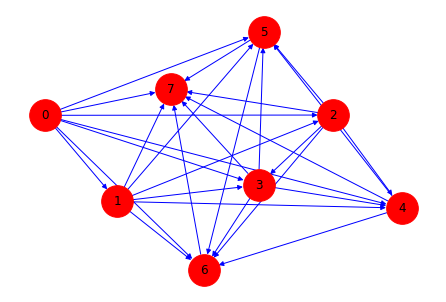

In [105]:
#дополнение матрицы дорог кратчайшими расстояниями между всеми вершинами взвешенного ориентированного графа
#ищем новые маршруты между точками через доп.вершиены (может работать с отрицательными дугами, но с ними в итоге получаются страааанные вещи)

import math
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import time

try:
  #считываем текстовый файл
  with open("/content/drive/MyDrive/CIAOD and VVIT/Lab6Files/FloUorAlgo.txt", "r", encoding = "utf-8") as fileFloUor:
    matrix = [[int(num) for num in line.split(',')] for line in fileFloUor] #загружаем матрицу дорог графа

    #ниже на нулях в матрице (кроме j) ставила бесконечность, т.к иначе всё работает не правильно
    for i in range(len(matrix)):
      for j in range(len(matrix[i])):
          if (i!=j and matrix[i][j] == 0):
              matrix[i][j] = math.inf
    
    #вывод начальной матрицы (теперь с inf вместо нулей)
    print("Матрица дорог (вершины 0-7): ")
    for i in matrix:
      print(i)
    
    N = len(matrix) #число вершин
    # T = [[matrix for matrix in range(N)] for u in range(N)] #список промежуточных вершин, через которые проходим

    start_time = time.perf_counter() 

    #сам алгоритм 
    for k in range(N):
      for i in range(N):
        for j in range(N):
          point = matrix[i][k] + matrix[k][j] #определяем длину маршрута через доп.вершину
          if (matrix[i][j] > point): #если длина данного маршрута меньше того, что прописан в матрице (и тем более если в матрице его нету)
            matrix[i][j] = point #дополняем и заменяем в матрице дорог маршрут
            # T[i][j] = point #записываем в список номер вершины, через которую нужно пройти, чтобы дойти из точки j в точку i (вершина k)
    
    final_time = time.perf_counter()
    time1 = (final_time-start_time)/0.10 
    
    #после того, как выполнили алгоритм, выводим дополненную матрицу дорог
    print("\nДополненная матрица дорог со всеми возможными дорогами от всех точек до всех: ")
    for i in matrix:
      print(i)
    
    print("\nГраф всех возможных путей: ")
    #отрисовка графа со всеми маршрутами
    graph = nx.Graph(np.matrix(matrix))
    nx.draw(graph, pos = nx.spring_layout(graph), edge_color = 'b', node_color = 'r', with_labels = True, node_size = 1000, arrows = True)

except FileNotFoundError:
  print("Файл не был найден") 

###Алгоритм Дейкстры

Матрица дорог (вершины 0-5): 
[0, 3, 1, 3, 0, 0]
[3, 0, 4, 0, 0, 0]
[1, 4, 0, 0, 7, 5]
[3, 0, 0, 0, 0, 2]
[0, 0, 7, 0, 0, 4]
[0, 0, 5, 2, 4, 0]

Длины кратчайших путей от вершины 0 до всех остальных вершин соотвественно: 
[0, 3, 1, 3, 8, 5]

Граф путей: 


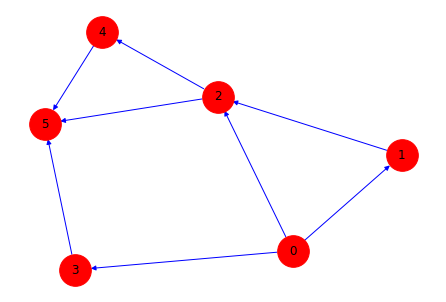

In [104]:
#алгоритм нахождения кратчайших путей от вершины 0 до всех остальных вершин

import math
import networkx as nx
import matplotlib.pyplot as plt
import time

try:
  #считываем текстовый файл
  with open("/content/drive/MyDrive/CIAOD and VVIT/Lab6Files/DijkstraAlgo.txt", "r", encoding = "utf-8") as fileDij:
    matrix = [[int(num) for num in line.split(',')] for line in fileDij] #загружаем матрицу дорог графа

    #отображение матрицы дорог (тут не понадобилось нули заменять на inf)
    print("Матрица дорог (вершины 0-5): ")
    for i in matrix:
      print(i)
    
    # print("\nОтображение графа: ")
    # G = nx.Graph()
    # G.add_edges_from([(1,2),(1,3),(1,4),(2,3),(3,5),(3,6),(4,6),(5,6)])
    # nx.draw(G, with_labels = True, edge_color = 'b', node_color = 'r', node_size = 1000, arrows = True)
    # plt.show()

    #метод перебора всех связанных вершин
    #просматриваем все веса других, связанных с startV, вершин, и возвращаем вершину с мин.значением
    def getLinkWithV(startV, matrix):
      for i, weight in enumerate(matrix[startV]): #берём веса из матрицы
        if (weight > 0):
          yield i

    #метод нахождения в матрице вершины с мин.весом (для изменения startV)
    def findMinWei(T, viewedV):
      amin = -1 #начальный минимум, начальное состояние
      m = max(T) #находим макс.значение финимальной строки длин дорог
      for i, t in enumerate(T):
        if (t < m and i not in viewedV): #находим мин.значение вершин, которые не были ещё рассмотрены
            m = t
            amin = i
      return amin #возвращаем вершину с мин.значением

    def DejAlgo(matrix, start, fin):
      N = fin + 1
      T = [math.inf] * N #финальная строка длин дорог (inf - бесконечность)
      startV = start #стартовая вершина
      viewedV = {startV} #множество просмотренных вершин (в зависимости от стартовой вершины)
      T[startV] = 0 #нулевой вес стартовой вершины должен быть равен 0!

      #заполяем T-табличку мин.весами
      while (startV != -1): #цикл для прохождению по вершинам (если -1, то по всем вершинам прошли)
        for j in getLinkWithV(startV, matrix): #перебераем все связанные вершины с вершиной startV
          if (j not in viewedV): #если рассматриваемая строка таблицы не была просмотрена
            wei = T[startV] + matrix[startV][j] #получаем путь, что прошли до минимальной вершины
            if (wei < T[j]): #если вес меньше последней позиции нашей финальной строки
              T[j] = wei #присваиваем минимальное значение, то есть меняем мин.длину
        #должны найти мин.аргумент между последней строчкой и множеством, что уже было просмотрено
        startV = findMinWei(T, viewedV) #находим мин.значение вершины
        if (startV > 0):
          viewedV.add(startV)
      return(T)

    print("\nДлины кратчайших путей от вершины 0 до всех остальных вершин соотвественно: ")

    start_time = time.perf_counter() 

    print(DejAlgo(matrix, 0, 5)) 

    final_time = time.perf_counter()
    time2 = (final_time-start_time)/0.10
    

    # print("\nОтображение кратчайшего расстояния между вершиной 1 и всеми остальными вершинами: ")
    # G = nx.Graph()
    # G.add_edge('1', '2', width = 10)  
    # G.add_edge('1', '4', width = 1.0)  
    # nx.draw(G, with_labels = True, edge_color = 'b', node_color = 'r', node_size = 1000)
    # plt.show()
    
    print("\nГраф путей: ")
    #отрисовка графа маршрутов
    graph = nx.Graph(np.matrix(matrix))
    nx.draw(graph, pos = nx.spring_layout(graph), edge_color = 'b', node_color = 'r', with_labels = True, node_size = 1000, arrows = True)
    

except FileNotFoundError:
  print("Файл не был найден") 

In [103]:
#иная реализация алгоритма Дейкстры, который возвращает кратчайшие пути
#от 0 до всех остальных вершин, и точки, что входят в эти пути
#(нужно в алгоритме Джонсона)

import math

def anotherDejAlgo(matrix, start):
  fullDist = [math.inf for item in matrix]
  fullDist[start] = 0 #нулевой вес стартовой вершины
  startV = start
  # paths = [[start] for item in matrix]
  nextV = fullDist.copy()
  for k in range(len(fullDist)):
      for i in range(len(fullDist)):  
          if matrix[startV][i] != math.inf and fullDist[startV] != math.inf and fullDist[i] > matrix[startV][i] + fullDist[startV]:
              fullDist[i] = matrix[startV][i] + fullDist[startV]
              nextV[i] = fullDist[i]
              # paths[i] = paths[startV].copy()
              # paths[i].append(i)
      nextV[startV] = math.inf
      startV = min(range(len(nextV)), key = nextV.__getitem__)
  return fullDist

fullDist = anotherDejAlgo(matrix, 0)
print("Длины кратчайших путей от вершины 0 до всех остальных вершин соотвественно: ")
print(fullDist)

Длины кратчайших путей от вершины 0 до всех остальных вершин соотвественно: 
[0, 3, 1, 3, 8, 5]


###Алгоритм Беллмана-Форда

Матрица дорог (вершины 0-5): 
[0, 3, 1, 3, 0, 0]
[3, 0, 4, 0, 0, 0]
[1, 4, 0, 0, 7, 5]
[3, 0, 0, 0, 0, 2]
[0, 0, 7, 0, 0, 4]
[0, 0, 5, 2, 4, 0]

Длины кратчайших путей от вершины 0 до вершины N включительно: 
[0, 3, 1, 3, 8, 5]

Граф путей: 


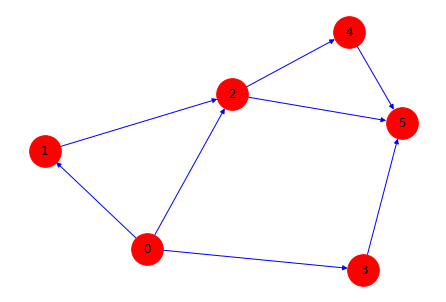

In [106]:
#для нахождения кратчайшего пути от стартовой вершины до всех других вершин (похоже на Дейкстры)
#можем работать с графами, в которых есть отрицательные рёбра 

import math
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import time

try:
  #считываем текстовый файл
  with open("/content/drive/MyDrive/CIAOD and VVIT/Lab6Files/DijkstraAlgo.txt", "r", encoding = "utf-8") as fileBF: #использую тот же файл, что и для Дейкстры
    matrix = [[int(num) for num in line.split(',')] for line in fileBF] #загружаем матрицу дорог графа

    #отрисовка графа маршрутов (вставлю тут, так как всё равно нарисуется после всего кода, а если вставить в конце, то не хочет работать)
    graph = nx.Graph(np.matrix(matrix))
    nx.draw(graph, pos = nx.spring_layout(graph), edge_color = 'b', node_color = 'r', with_labels = True, node_size = 1000, arrows = True)

    print("Матрица дорог (вершины 0-5): ")
    for i in matrix:
      print(i)

    #ниже на нулях в матрице (кроме j) ставила бесконечность, т.к иначе всё работает не правильно
    for i in range(len(matrix)):
      for j in range(len(matrix[i])):
          if (i!=j and matrix[i][j] == 0):
              matrix[i][j] = math.inf

    def BelFordAlgo(matrix, start, fin):

      startV = start #стартовая вершина

      # N = len(matrix) #число вершин в нашем графе
      N = fin + 1
      T = [math.inf] * N #финальная строка длин дорог (inf - бесконечность)
      T[startV] = 0

      #пересчёт финального массива путей
      for k in range(1, N):
          for i in range(N):
              for j in range(N):
                  if (T[j] + matrix[j][i] < T[i]):
                      T[i] = T[j] + matrix[j][i]
      return(T)

  print("\nДлины кратчайших путей от вершины 0 до вершины N включительно: ")

  start_time = time.perf_counter() 

  print(BelFordAlgo(matrix, 0, 5))

  final_time = time.perf_counter()
  time3 = (final_time-start_time)/0.10

  print("\nГраф путей: ")

except FileNotFoundError:
  print("Файл не был найден") 

In [107]:
#иная реализация алгоритма Беллмана-Форда, который возвращает кратчайшие пути
#от 0 до всех остальных вершин, и точки, что входят в эти пути
#(нужно в алгоритме Джонсона и Йена)

import math

def anotherBellFordAlgo(matrix, start): #для примера взяла матрицу из начального алгоритма Беллмана-Форда
    #расстояния от исходной вершины до всех остальных
    fullDist = [math.inf for item in matrix]
    fullDist[start] = 0
    paths = [[start] for item in matrix]
    for i in range(len(matrix)):
      for u in range(len(matrix)):
        for v in range(len(matrix)):
          #проверка на отрицательное значение
          if (fullDist[u] != math.inf and matrix[u][v] != math.inf and fullDist[v] > fullDist[u] + matrix[u][v]):
              fullDist[v] = fullDist[u] + matrix[u][v]
              paths[v] = paths[u].copy()
              paths[v].append(v)
    return fullDist, paths

fullDist, paths = anotherBellFordAlgo(matrix, 0)
print("Длины кратчайших путей от вершины 0 до всех остальных вершин соотвественно: ")
print(fullDist)
print("Вершины, что образуют эти пути: ")
print(paths)

Длины кратчайших путей от вершины 0 до всех остальных вершин соотвественно: 
[0, 3, 1, 3, 8, 5]
Вершины, что образуют эти пути: 
[[0], [0, 1], [0, 2], [0, 3], [0, 2, 4], [0, 3, 5]]


###Алгоритм Джонсона

Матрица дорог (вершины 0-5): 
[0, 2, inf, 3, 1, inf, inf, 10]
[2, 0, 4, inf, inf, inf, inf, inf]
[inf, 4, 0, inf, inf, inf, inf, 3]
[3, inf, inf, 0, inf, inf, inf, 8]
[1, inf, inf, inf, 0, 2, inf, inf]
[inf, inf, inf, inf, 2, 0, 3, inf]
[inf, inf, inf, inf, inf, 3, 0, 1]
[10, inf, 3, 8, inf, inf, 1, 0]

Дополненная матрица дорог со всеми возможными дорогами от всех точек до всех: 
[0, 2, 6, 3, 1, 3, 6, 7]
[2, 0, 4, 5, 3, 5, 8, 7]
[6, 4, 0, 9, 7, 7, 4, 3]
[3, 5, 9, 0, 4, 6, 9, 8]
[1, 3, 7, 4, 0, 2, 5, 6]
[3, 5, 7, 6, 2, 0, 3, 4]
[6, 8, 4, 9, 5, 3, 0, 1]
[7, 7, 3, 8, 6, 4, 1, 0]

Граф всех возможных путей: 


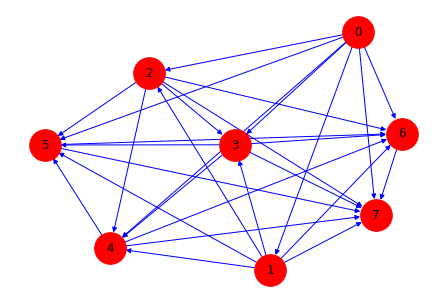

In [108]:
#как и в Флойда-Уоршелла, находим кратчайшие пути между всеми парами вершин во взвешенном ориентированном графе 
#(также с возможностью работы с отрицательными весами)
#в данном алгоритме применяется алгоритм Беллмана-Форда и Дейкстры

import math
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

try:
  #считываем текстовый файл
  with open("/content/drive/MyDrive/CIAOD and VVIT/Lab6Files/FloUorAlgo.txt", "r", encoding = "utf-8") as fileDjo: #использую тот же файл, что и для алгоритма Флойда-Уоршелла
    matrix = [[int(num) for num in line.split(',')] for line in fileDjo] #загружаем матрицу дорог графа
    n = len(matrix)

    #ниже на нулях в матрице (кроме j) ставила бесконечность, т.к иначе всё работает не правильно
    for i in range(len(matrix)):
      for j in range(len(matrix[i])):
          if (i != j and matrix[i][j] == 0):
              matrix[i][j] = math.inf
    
    print("Матрица дорог (вершины 0-5): ")
    for i in matrix:
      print(i)


    def jonsonAlgo(matrix):
      new_mat = matrix.copy() 
      for item in new_mat:
          item.append(math.inf) 
      new_mat.append([]) #для избежания отрицательных значений добавляем дополнительный столбец и строку
      for i in range(len(new_mat)):
          new_mat[-1].append(0)
      dist, paths = anotherBellFordAlgo(new_mat, len(new_mat) - 1) #находим первый кратчайший путь
      #обновляем кратчайшие пути в матрице
      for i in range(len(matrix)):
          for j in range(len(matrix)):
              if (matrix[i][j] != math.inf and dist[i] != math.inf and dist[j] != math.inf):
                  matrix[i][j] += dist[i] - dist[j]
      result = []
      for i in range(len(matrix)):
              distDej = anotherDejAlgo(matrix, i) #проводим матрицу через алгоритм Дейкстры
              result.append(distDej)
      #снова обновляем кратчайшие пути в матрице
      for i in range(len(matrix)):
          for j in range(len(matrix)):
              if result[i][j] != math.inf and dist[i] != math.inf and dist[j] != math.inf:
                  result[i][j] +=  dist[j] - dist[i]
      return result

    start_time = time.perf_counter() 

    fullMat = jonsonAlgo(matrix)

    final_time = time.perf_counter()
    time4 = (final_time-start_time)/0.10

    #после того, как выполнили алгоритм, выводим дополненную матрицу дорог
    print("\nДополненная матрица дорог со всеми возможными дорогами от всех точек до всех: ")
    for i in fullMat:
      print(i)

    print("\nГраф всех возможных путей: ")
    #отрисовка графа со всеми маршрутами
    graph = nx.Graph(np.matrix(fullMat))
    nx.draw(graph, pos = nx.spring_layout(graph), edge_color = 'b', node_color = 'r', with_labels = True, node_size = 1000, arrows = True)

except FileNotFoundError:
  print("Файл не был найден") 

###Алгоритм Левита

Матрица дорог (вершины 0-5): 
[0, 3, 1, 3, 0, 0]
[3, 0, 4, 0, 0, 0]
[1, 4, 0, 0, 7, 5]
[3, 0, 0, 0, 0, 2]
[0, 0, 7, 0, 0, 4]
[0, 0, 5, 2, 4, 0]

Длины кратчайших путей от вершины 0 до всех остальных вершин соотвественно: 
[0, 3, 1, 3, 8, 5]

Граф путей: 


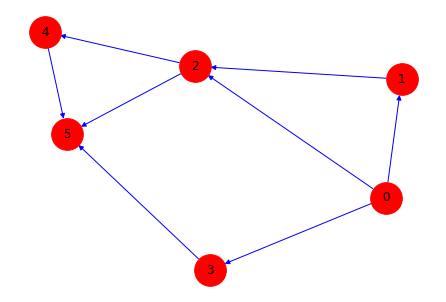

In [109]:
#алгоритм нахождения кратчайшего пути от стартовой вершины до всех других вершин
#используя три множества m0,m1,m2

import math
import networkx as nx
import matplotlib.pyplot as plt
import time

try:
  #считываем текстовый файл
  with open("/content/drive/MyDrive/CIAOD and VVIT/Lab6Files/DijkstraAlgo.txt", "r", encoding = "utf-8") as fileDij:
    matrix = [[int(num) for num in line.split(',')] for line in fileDij] #загружаем матрицу дорог графа

    #отображение матрицы дорог (тут не понадобилось нули заменять на inf)
    print("Матрица дорог (вершины 0-5): ")
    for i in matrix:
      print(i)
    
    #отрисовка графа маршрутов (вставлю тут, так как всё равно нарисуется после всего кода, а если вставить в конце, то не хочет работать)
    graph = nx.Graph(np.matrix(matrix))
    nx.draw(graph, pos = nx.spring_layout(graph), edge_color = 'b', node_color = 'r', with_labels = True, node_size = 1000, arrows = True)
    
    #ниже на нулях в матрице (кроме j) ставила бесконечность, т.к иначе всё работает не правильно
    for i in range(len(matrix)):
      for j in range(len(matrix[i])):
        if (i!=j and matrix[i][j] == 0):
              matrix[i][j] = math.inf
    
    def LevitAlgo(matrix, start):
      T = [math.inf for item in matrix]
      T[start] = 0 #массив текущих кратчайших путей
      m0 = set() #set вершин, расстояние до которых уже было вычислено
      m1 = {'main': [start], 'urgent': []} #вершины, расстояние до которых ещё вычисляется, с подочередями: основная очередь и очередь с приоритетом
      m2 = set(range(len(matrix))) #вершины, расстояние до которых ещё не вычислено (сюда и помещаем все значения изначально)
      m2.remove(start)
      while (len(m1['main']) or len(m1['urgent'])): 
          i = None
          if (len(m1['urgent'])): #если срочная очередь не пуста
              i = m1['urgent'].pop(0)
          else:
              i = m1['main'].pop(0)
          for v in range(len(matrix)):
              if (T[i] == math.inf or matrix[i][v] == math.inf):
                  continue
              #если вершина v принадлежит m2, то v переносим в m1 в конец
              if (v in m2):
                  m2.remove(v)
                  m1['main'].append(v)
                  T[v] = min(T[v], T[i] + matrix[i][v])
              #если вершина v принадлежит m1, то пытаемся изначенить значение T[v] (то есть сделать короче)
              elif (v in m1['main'] or v in m1['urgent']):
                  T[v] = min(T[v], T[i] + matrix[i][v])
              #если вершина v принадлежит m0, и если T[v] можно сделать короче
              elif v in m0 and T[v] > T[i] + matrix[i][v]:
                  m0.remove(v)
                  m1['urgent'].append(v) #улучшаем T[v], вершину v возвращаем в множество m1 в начало
                  T[v] = T[i] + matrix[i][v]
          m0.add(i)
      return T
    
    start_time = time.perf_counter() 

    fullDist = LevitAlgo(matrix, 0)

    final_time = time.perf_counter()
    time5 = (final_time-start_time)/0.10

    print("\nДлины кратчайших путей от вершины 0 до всех остальных вершин соотвественно: ")
    print(fullDist)

    print("\nГраф путей: ")
    

except FileNotFoundError:
  print("Файл не был найден") 

###Алгоритм Йена

Матрица дорог (вершины 0-5): 
[0, 3, 1, 3, 0, 0]
[3, 0, 4, 0, 0, 0]
[1, 4, 0, 0, 7, 5]
[3, 0, 0, 0, 0, 2]
[0, 0, 7, 0, 0, 4]
[0, 0, 5, 2, 4, 0]

Длины кратчайших путей между заданными точками (в данном случае трёх путей между 0 и 3): 
[3, 8, 14]

Вершины, что образуют данные пути: 
[[0, 3], [0, 2, 5, 3], [0, 1, 2, 5, 3]]

Граф путей: 


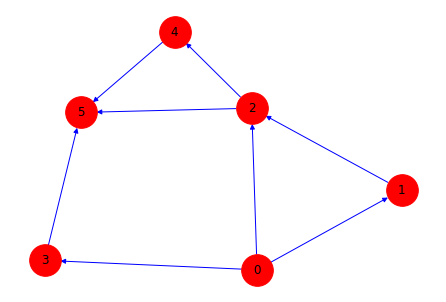

In [110]:
#алгоритм для нахождения длин кратчайшех путей из одной вершины в другую
#используем тут также алгоритм Белллмана-Форда, так как нам нужно будет находить один кратчайший путь в графе

import math
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import time

try:
  with open("/content/drive/MyDrive/CIAOD and VVIT/Lab6Files/DijkstraAlgo.txt", "r", encoding = "utf-8") as fileBF: #использую тот же файл, что и для Дейкстры
      matrix = [[int(num) for num in line.split(',')] for line in fileBF] #загружаем матрицу дорог графа

      #отрисовка графа маршрутов (вставлю тут, так как всё равно нарисуется после всего кода, а если вставить в конце, то не хочет работать)
      graph = nx.Graph(np.matrix(matrix))
      nx.draw(graph, pos = nx.spring_layout(graph), edge_color = 'b', node_color = 'r', with_labels = True, node_size = 1000, arrows = True)

      #вывод начальной матрицы путей
      print("Матрица дорог (вершины 0-5): ")
      for i in matrix:
        print(i)

      #ниже на нулях в матрице (кроме j) ставила бесконечность, т.к иначе всё работает не правильно
      for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if (i!=j and matrix[i][j] == 0):
                matrix[i][j] = math.inf

      def YenAlgo(matrix, start, finish, pathsShorten):
          candidates = set() #список кандидатов в кратчайшие пути
          fullDist, paths = anotherBellFordAlgo(matrix, start) #находим первый кратчайший путь
          resultDist = [fullDist[finish]] #массив длинн (результирующий)
          resultPaths = [paths[finish]] #массив вершин, образующие пути

          for shortP in range(1, pathsShorten): #ищем столько кротчайших путей, сколько было задано в методе
            newMat = matrix
            for i in range(len(resultPaths[-1]) - 1):
              spurNode = resultPaths[-1][i] 
              rootPath = resultPaths[-1][:i + 1]

              for path in resultPaths:
                if (rootPath == path[:i + 1]):
                  newMat[path[i]][path[i + 1]] = math.inf
              
              for node in rootPath:
                if (node != spurNode):
                    newMat[node] = [math.inf for j in range(len(matrix))]
              fullDist, paths = anotherBellFordAlgo(matrix, start) #определяем новый кратчайший путь
              spurPath = paths[finish][1:]
              if len(spurPath) == 0:
                  continue
              totalPath = rootPath
              totalPath.extend(spurPath)
              totalPath = tuple(totalPath) #делаем кортеж путей, дабы добавить их в список кандидатов
              totalDist = 0

              for j in range(1, len(totalPath)):
                  totalDist += matrix[totalPath[j - 1]][totalPath[j]] 
              candidates.add((totalPath, totalDist)) #добавляем найденные длинны и пути в список кандидатов
            if not len(candidates):
                break
            candidates_l = list(candidates)
            candidates_l.sort(key = lambda x: x[1])
            
            resultPaths.append(list(candidates_l[0][0]))
            resultDist.append(candidates_l[0][1])
            
            candidates.remove(candidates_l[0]) #удаляем первое ребро, чтобы пути не совпадали
                    
          return resultDist, resultPaths

      start_time = time.perf_counter() 

      dist, paths = YenAlgo(matrix, 0, 3, 3)

      final_time = time.perf_counter()
      time6 = (final_time-start_time)/0.10

      print("\nДлины кратчайших путей между заданными точками (в данном случае трёх путей между 0 и 3): ")
      print(dist)
      print("\nВершины, что образуют данные пути: ")
      print(paths)

      print("\nГраф путей: ")
  
except FileNotFoundError:
  print("Файл не был найден") 

###Таблица зависимостей времени построения от количества вершин

In [112]:
import pandas as panda
table = [["Алгоритм Флойда-Уоршелла", time1],
        ["Алгоритм Дейкстры", time2],
        ["Алгоритм Беллмана-Форда", time3],
        ["Алгоритм Джонсона", time4],
        ["Алгоритм Левита", time5],
        ["Алгоритм Йена", time6]]

panda.DataFrame(table, columns=["Название алгоритма", "Время при количестве вершин = 6"])

,Название алгоритма,Время при количестве вершин = 6
0,Алгоритм Флойда-Уоршелла,0.002266
1,Алгоритм Дейкстры,0.002905
2,Алгоритм Беллмана-Форда,0.004266
3,Алгоритм Джонсона,0.005663
4,Алгоритм Левита,0.000713
5,Алгоритм Йена,0.003978
